# ${}^{4}{\rm He}$

The interaction is defined in `helium4.py`. It is nonlocal, and so is the counterterm. We will use it to tune the scattering length over a range of short-distance cutoffs, $R$.

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

import mu2

import helium4plusplus as he4

In [2]:
ELL = 0

rg_flow = np.loadtxt('datfiles/rg-flow-semilocal-1.dat')

In [3]:
momenta = np.linspace(0.01/he4.BETA6, 0.3/he4.BETA6, 30)
# X = he4.FACTOR * he4.BETA6 # K•Å^3

In [4]:
nR = rg_flow.shape[0]
a0s = np.zeros(nR)
r0s = np.zeros(nR)
spectra = []
b2s = np.zeros(nR)

for i in range(nR):
    R, glo, gnlo = rg_flow[i]
    s = he4.NonlocalHelium4System2(R, ELL, 2, 6, 6, nq=200)
    a0, r0 = s.a0_and_r0(glo, gnlo, momenta, use_c=True)
    spec = s.bound_state_spectrum(glo, gnlo)
    spectra.append(spec)
    b2 = np.abs(spec[0])
    
    a0s[i] = a0
    r0s[i] = r0
    b2s[i] = b2

    print(f'{a0:.4e}  {r0:.4e}  {b2:.4e}')

9.9998e+01  7.3342e+00  1.3111e-03
9.9998e+01  7.3321e+00  1.3111e-03
9.9998e+01  7.3355e+00  1.3111e-03
9.0376e+01  7.2361e+00  1.6173e-03
9.9998e+01  7.3339e+00  1.3110e-03
9.9998e+01  7.3321e+00  1.3110e-03
9.9998e+01  7.3301e+00  1.3109e-03
9.9998e+01  7.3360e+00  1.3110e-03
9.9998e+01  7.3327e+00  1.3111e-03
9.9998e+01  7.3356e+00  1.3111e-03
9.9998e+01  7.3341e+00  1.3110e-03
9.9998e+01  7.3352e+00  1.3111e-03
9.9998e+01  7.3306e+00  1.3110e-03
9.9998e+01  7.3371e+00  1.3111e-03
9.9998e+01  7.3353e+00  1.3110e-03
9.9998e+01  7.3315e+00  1.3110e-03
9.9998e+01  7.3310e+00  1.3110e-03
9.9998e+01  7.3315e+00  1.3110e-03
9.9998e+01  7.3299e+00  1.3109e-03
9.9998e+01  7.3304e+00  1.3110e-03
9.9998e+01  7.3296e+00  1.3109e-03
9.9998e+01  7.3365e+00  1.3111e-03
9.9998e+01  7.3368e+00  1.3111e-03
9.9998e+01  7.3368e+00  1.3111e-03
9.9998e+01  7.3368e+00  1.3111e-03
9.9998e+01  7.3407e+00  1.3111e-03
9.9998e+01  7.3347e+00  1.3110e-03
9.9998e+01  7.3538e+00  1.3113e-03
9.9998e+01  7.3887e+

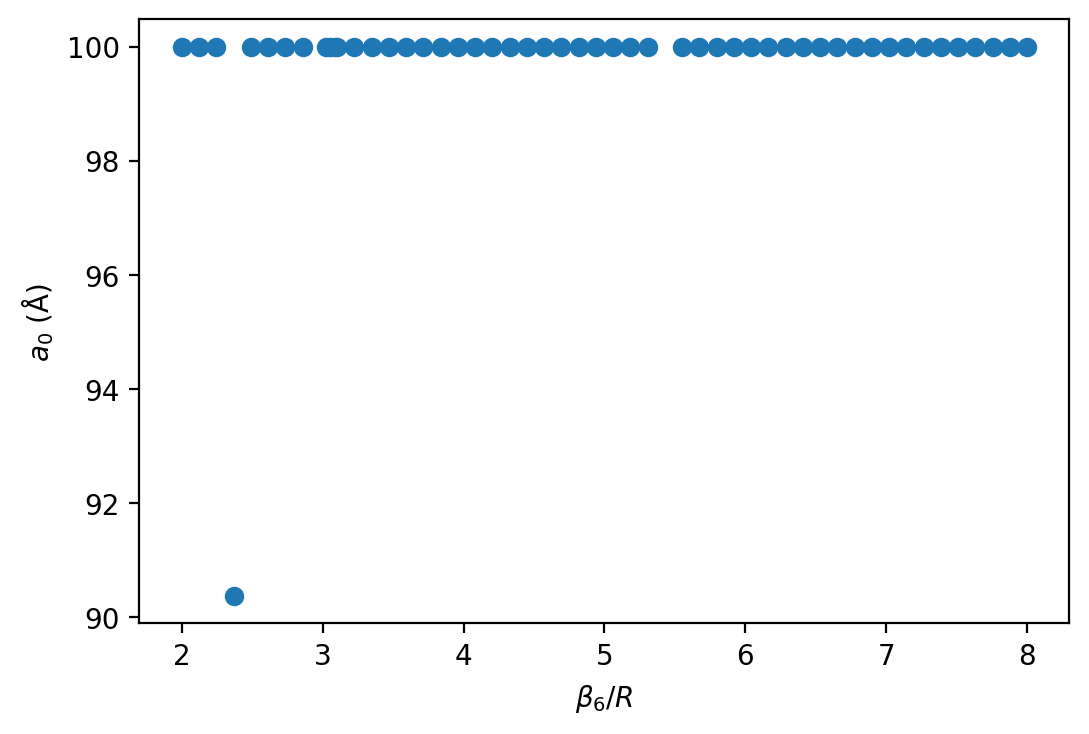

In [5]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.scatter(he4.BETA6/rg_flow[:, 0], a0s)
# ax.axvline(he4.BETA6/rg_flow[27, 0], color='C6', linestyle='--')
# ax.axvline(he4.BETA6/rg_flow[28, 0], color='C6', linestyle='--')

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$a_0$ (Å)');

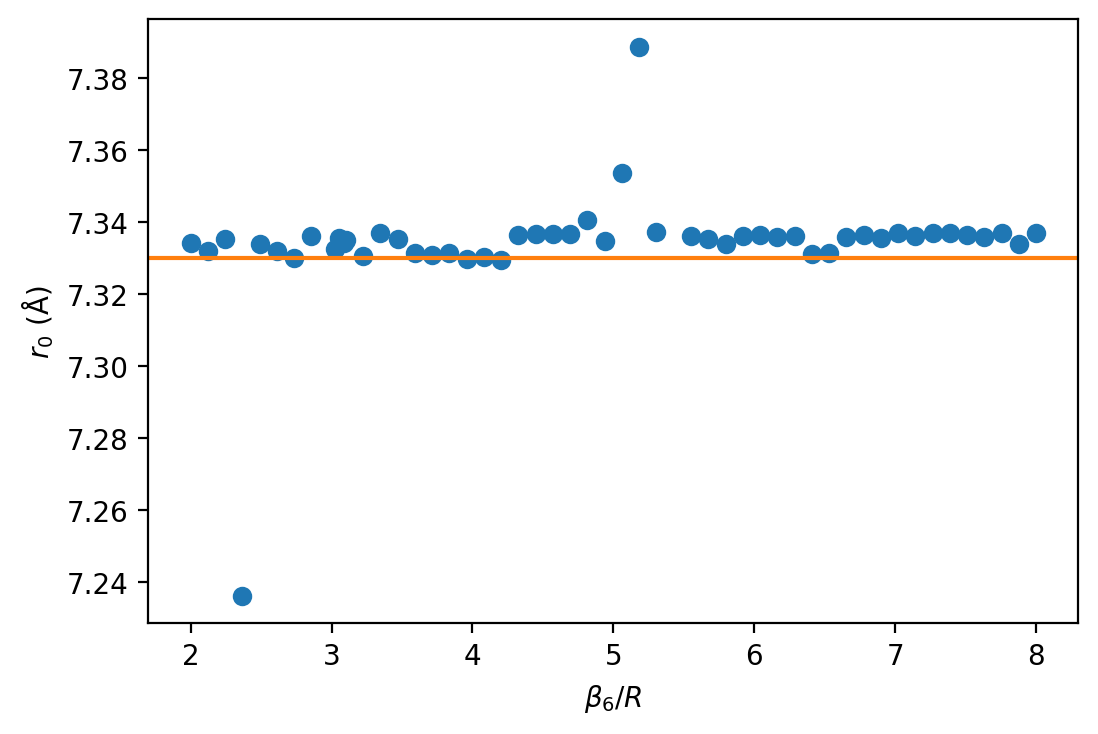

In [6]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.scatter(he4.BETA6/rg_flow[:, 0], r0s)
# ax.axvline(he4.BETA6/rg_flow[27, 0], color='C6', linestyle='--')
# ax.axvline(he4.BETA6/rg_flow[28, 0], color='C6', linestyle='--')
ax.axhline(he4.R0, color='C1', linestyle='-')

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$r_0$ (Å)');

In [7]:
for (i, ratio) in enumerate(he4.BETA6/rg_flow[:, 0]):
    print(i, ratio)

0 2.0
1 2.1224489795918364
2 2.2448979591836733
3 2.36734693877551
4 2.489795918367347
5 2.6122448979591835
6 2.734693877551021
7 2.857142857142857
8 3.024369610304552
9 3.055397183713665
10 3.0865314989138306
11 3.1020408163265305
12 3.2244897959183674
13 3.346938775510204
14 3.4693877551020407
15 3.591836734693878
16 3.714285714285714
17 3.836734693877551
18 3.959183673469387
19 4.081632653061225
20 4.20408163265306
21 4.326530612244898
22 4.448979591836734
23 4.571428571428571
24 4.6938775510204085
25 4.816326530612245
26 4.938775510204082
27 5.061224489795918
28 5.183673469387755
29 5.3061224489795915
30 5.551020408163265
31 5.673469387755102
32 5.795918367346938
33 5.918367346938775
34 6.040816326530612
35 6.163265306122449
36 6.285714285714285
37 6.408163265306122
38 6.530612244897958
39 6.653061224489795
40 6.775510204081632
41 6.8979591836734695
42 7.020408163265307
43 7.142857142857142
44 7.26530612244898
45 7.387755102040816
46 7.510204081632653
47 7.632653061224489
48 7.7551

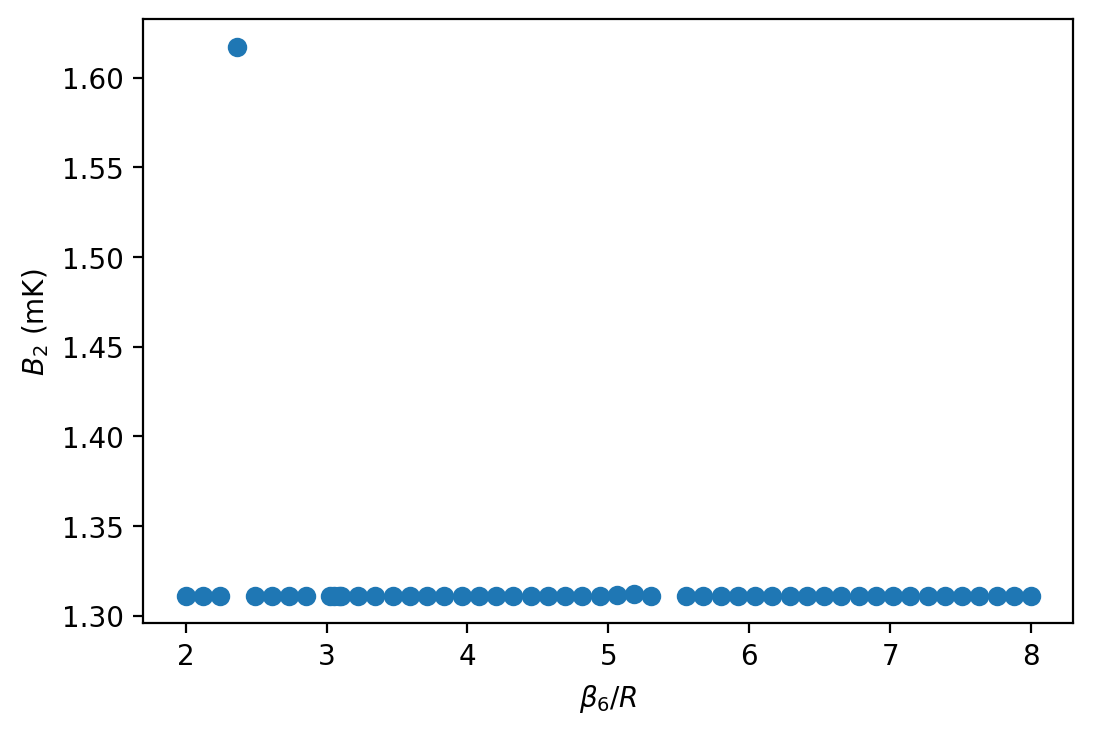

In [8]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.scatter(he4.BETA6/rg_flow[:, 0], b2s*1000)
# ax.axvline(he4.BETA6/rg_flow[27, 0], color='C6', linestyle='--')
# ax.axvline(he4.BETA6/rg_flow[28, 0], color='C6', linestyle='--')
# ax.axhline(he4.R0, color='C1', linestyle='-')

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$B_2$ (mK)');

In [10]:
spectra_lo = np.loadtxt('datfiles/he4plusplus_spectra_nonlocal2.txt')

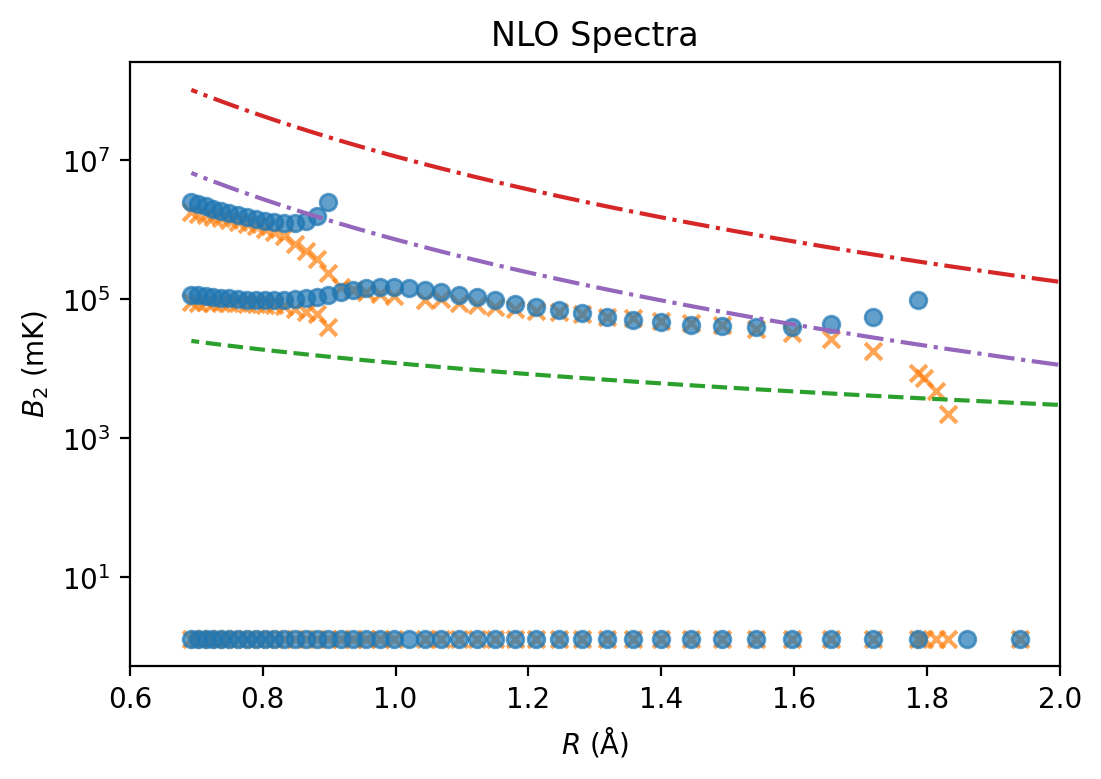

In [11]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

for (R, spec) in zip(rg_flow[:, 0], spectra):
    for s in spec:
        ax.scatter(R, -1000*s, color='C1', marker='x', alpha=0.7)

for row in spectra_lo:
    for s in row[1:]:
        if s != 0:
            ax.scatter(row[0], -1000*s, color='C0', alpha=0.7)

ax.axvline(rg_flow[3, 0])

ax.set_yscale('log')
# ax.axvline(he4.BETA6/rg_flow[18, 0], color='C6', linestyle='--')
# ax.axvline(he4.BETA6/rg_flow[19, 0], color='C6', linestyle='--')
# ax.axhline(he4.R0, color='C1', linestyle='-')

ax.plot(rg_flow[:, 0], 1000*1/(he4.MASS*rg_flow[:, 0]**2), color='C2', linestyle='--')
ax.plot(rg_flow[:, 0], 1000*he4.C6/rg_flow[:, 0]**6, linestyle='-.', color='C3')
ax.plot(rg_flow[:, 0], 1000*((1-np.exp(-1))**6 * he4.C6)/rg_flow[:, 0]**6, linestyle='-.', color='C4')

# ax.set_ylim([0, 0.4e6])
# ax.set_ylim([0, 0.01e6])
ax.set_xlim([0.6, 2])
ax.set_title('NLO Spectra')
ax.set_xlabel(r'$R$ (Å)')
ax.set_ylabel(r'$B_2$ (mK)');

In [26]:
he4.BETA6/1.8

3.078472222222222

In [21]:
1/(he4.MASS*rg_flow[:, 0]**2)

array([ 1.57877893,  1.77801676,  1.98909049,  2.21200014,  2.44674569,
        2.69332716,  2.95174453,  3.22199782,  3.61019834,  3.68465371,
        3.76012911,  3.79801212,  4.10377314,  4.42137007,  4.75080291,
        5.09207165,  5.44517631,  5.81011688,  6.18689336,  6.57550575,
        6.97595405,  7.38823826,  7.81235838,  8.24831442,  8.69610636,
        9.15573421,  9.62719797, 10.11049765, 10.60563323, 11.11260472,
       12.16205544, 12.70453466, 13.2588498 , 13.82500084, 14.4029878 ,
       14.99281067, 15.59446944, 16.20796413, 16.83329473, 17.47046123,
       18.11946365, 18.78030198, 19.45297622, 20.13748637, 20.83383243,
       21.5420144 , 22.26203228, 22.99388607, 23.73757577, 24.49310138,
       25.2604629 ])

Hmm, I don't see anything suspicious. What about NLO?

In [10]:
ELL = 0

rg_flow = np.loadtxt('datfiles/rg-flow-plus-1.dat')

In [11]:
rg_flow.shape

(27, 3)

In [12]:
Rs = rg_flow[:, 0]

In [13]:
nR = rg_flow.shape[0]
a0s = np.zeros(nR)
r0s = np.zeros(nR)
spectra = []

for i in range(nR):
    R, glo, gnlo = rg_flow[i]
    s = he4.Helium4System(R, ELL)
    a0, r0 = s.a0_and_r0(glo, gnlo, momenta, use_c=True)
    spec = s.bound_state_spectrum(glo, gnlo)
    b2 = np.abs(spec[0])
    
    a0s[i] = a0
    r0s[i] = r0
    spectra.append(spec)

    print(f'{a0:.4e}  {r0:.4e}  {b2:.4e}')

9.9994e+01  7.3335e+00  1.3111e-03
9.9994e+01  7.3337e+00  1.3111e-03
9.9998e+01  7.3389e+00  1.3111e-03
9.9998e+01  7.3379e+00  1.3111e-03
9.9998e+01  7.3327e+00  1.3110e-03
9.9998e+01  7.3342e+00  1.3110e-03
9.9998e+01  7.3368e+00  1.3110e-03
9.9998e+01  7.3357e+00  1.3110e-03
9.9998e+01  7.3285e+00  1.3109e-03
9.9998e+01  7.3328e+00  1.3110e-03
9.9998e+01  7.3284e+00  1.3109e-03
9.9998e+01  7.3347e+00  1.3110e-03
9.9998e+01  7.3350e+00  1.3110e-03
9.9998e+01  7.3341e+00  1.3110e-03
9.9998e+01  7.3362e+00  1.3110e-03
9.9998e+01  7.3297e+00  1.3109e-03
9.9998e+01  7.3325e+00  1.3110e-03
9.9998e+01  7.3310e+00  1.3110e-03
9.9998e+01  7.3371e+00  1.3111e-03
9.9998e+01  7.3363e+00  1.3110e-03
9.9998e+01  7.3314e+00  1.3110e-03
9.9998e+01  7.3775e+00  1.3117e-03
9.9998e+01  7.3335e+00  1.3110e-03
9.9998e+01  7.3326e+00  1.3110e-03
9.9998e+01  7.3336e+00  1.3110e-03
9.9998e+01  7.2243e+00  1.3093e-03
9.9998e+01  7.3358e+00  1.3110e-03


In [14]:
for (i, R) in enumerate(rg_flow[:, 0]):
    print(i, R)

0 1.859734589041096
1 1.7863240131578948
2 1.718488924050633
3 1.6556173780487806
4 1.5971838235294118
5 1.5427343749999998
6 1.491875
7 1.4442619680851063
8 1.35760625
9 1.3180643203883498
10 1.280760613207547
11 1.2455103211009175
12 1.2121484375
13 1.1805271739130434
14 1.1505137711864406
15 1.1219886363636362
16 1.0948437500000001
17 1.0689812992125984
18 1.0443125
19 1.0207565789473683
20 0.9560607394366198
21 0.9173015202702703
22 0.8815625000000001
23 0.84850390625
24 0.8178350903614459
25 0.7627001404494381
26 0.7259926470588236


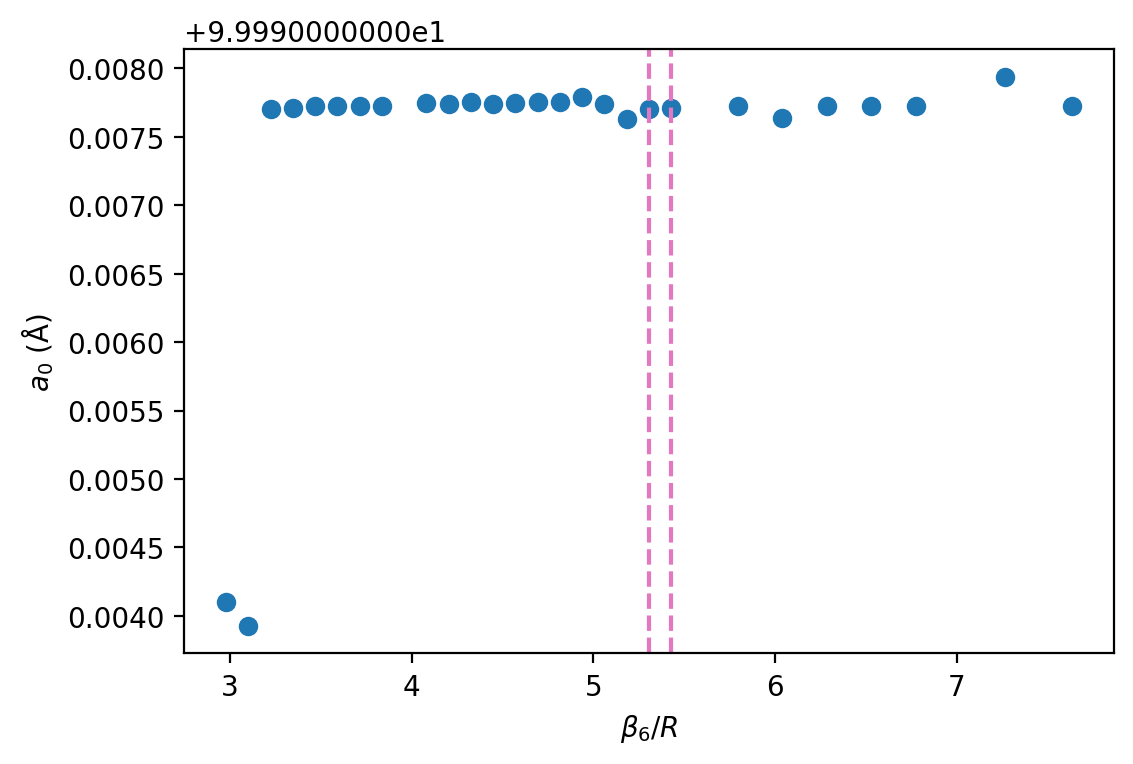

In [15]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.scatter(he4.BETA6/rg_flow[:, 0], a0s)
ax.axvline(he4.BETA6/rg_flow[18, 0], color='C6', linestyle='--')
ax.axvline(he4.BETA6/rg_flow[19, 0], color='C6', linestyle='--')

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$a_0$ (Å)');

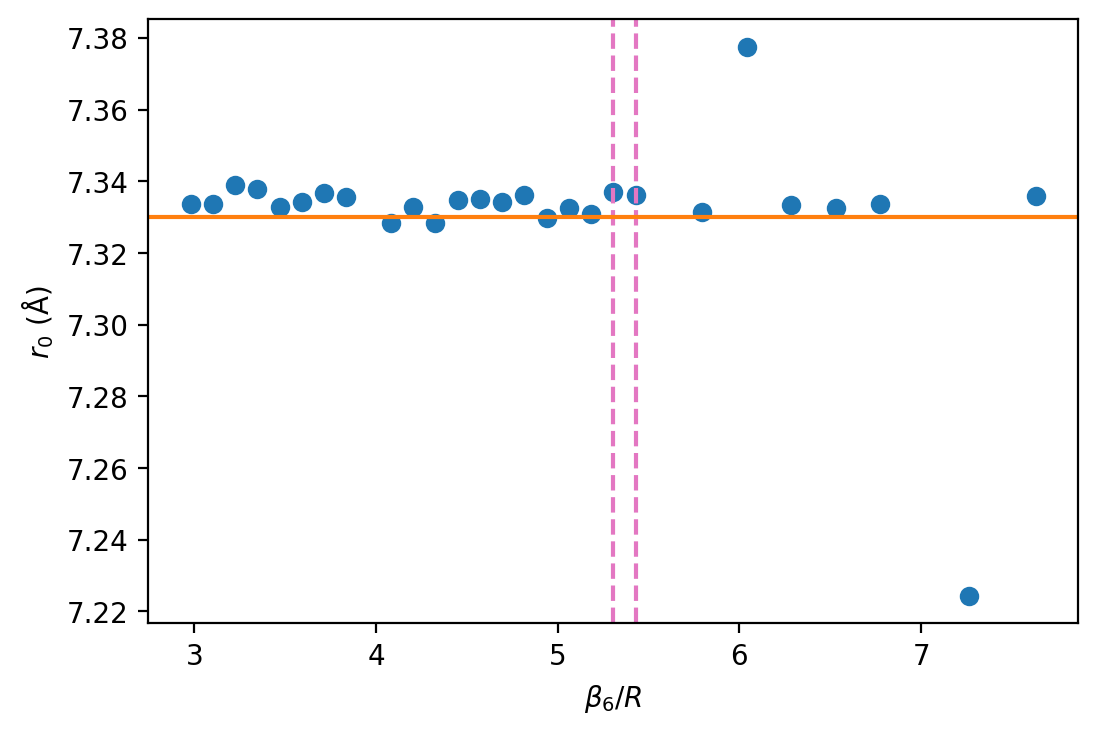

In [16]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.scatter(he4.BETA6/rg_flow[:, 0], r0s)
ax.axvline(he4.BETA6/rg_flow[18, 0], color='C6', linestyle='--')
ax.axvline(he4.BETA6/rg_flow[19, 0], color='C6', linestyle='--')
ax.axhline(he4.R0, color='C1', linestyle='-')

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$r_0$ (Å)');

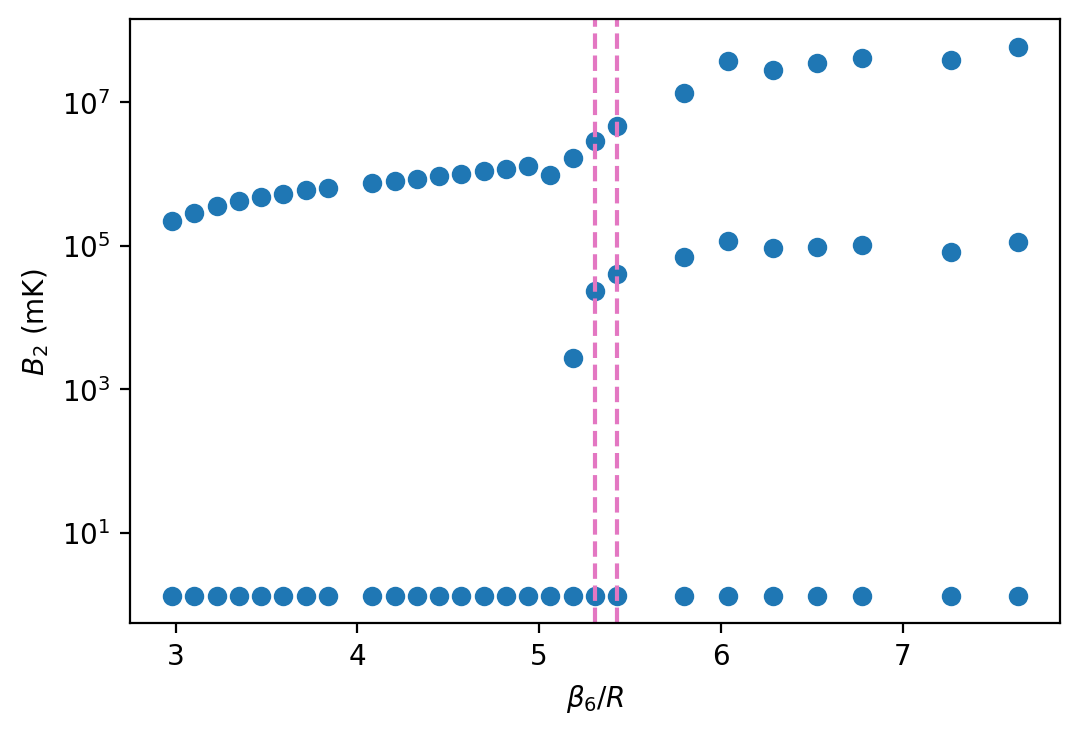

In [17]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

for (R, spec) in zip(rg_flow[:, 0], spectra):
    for s in spec:
        ax.scatter(he4.BETA6/R, -1000*s, color='C0')
        
ax.set_yscale('log')
ax.axvline(he4.BETA6/rg_flow[18, 0], color='C6', linestyle='--')
ax.axvline(he4.BETA6/rg_flow[19, 0], color='C6', linestyle='--')
# ax.axhline(he4.R0, color='C1', linestyle='-')

ax.set_xlabel(r'$\beta_6/R$')
ax.set_ylabel(r'$B_2$ (mK)');

In [25]:
from tqdm import tqdm

In [27]:
kcds_nlo = np.zeros((nR, momenta.size))

for i in tqdm(range(nR)):
    R, glo, gnlo = rg_flow[i]
    s = he4.Helium4System(R, ELL)
    kcds_nlo[i] = s.kcotd_gen_fast(momenta, glo, gnlo)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:49<00:00,  2.34s/it]


In [31]:
spectra[-1]

array([-1.31096955e-03, -7.07440204e+01, -1.33349580e+04])

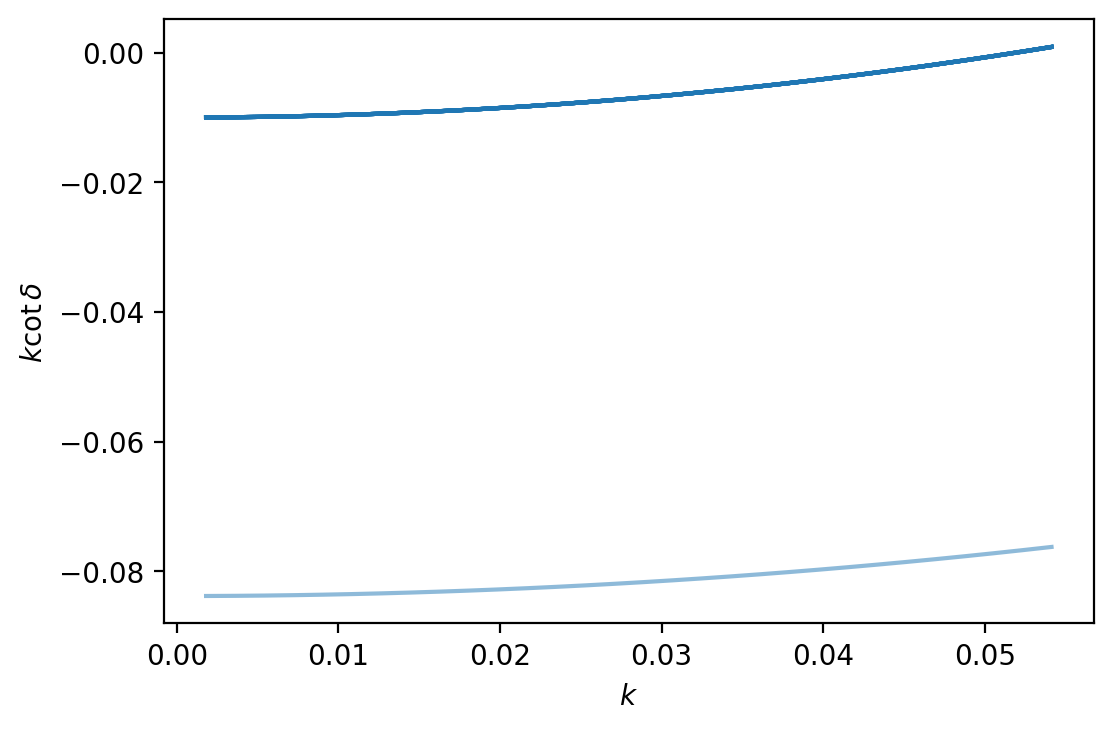

In [30]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

for row in kcds_nlo:
    ax.plot(momenta, row, alpha=0.5)

ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$k\cot\delta$');